In [9]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
from ase import Atom, Atoms
from ase.data import chemical_symbols, covalent_radii, vdw_alvarez
from ase.io import read, write
from pymatgen.core import Element
from scipy import stats
from scipy.interpolate import splrep, BSpline, CubicSpline, UnivariateSpline
from tqdm.auto import tqdm

from mlip_arena.models import MLIPEnum, REGISTRY

%matplotlib inline

# Compute MLIP homonuclear diatomics

In [2]:
for model in MLIPEnum:
    
    model_name = model.name
    
    if model_name != 'ORBv2':
        continue
    
    print(f"========== {model_name} ==========")

    calc = MLIPEnum[model_name].value()

    for symbol in tqdm(chemical_symbols[1:]):

        s = set([symbol])

        if "X" in s:
            continue

        try:
            atom = Atom(symbol)
            rmin = 0.9 * covalent_radii[atom.number]
            rvdw = vdw_alvarez.vdw_radii[atom.number] if atom.number < len(vdw_alvarez.vdw_radii) else np.nan
            rmax = 3.1 * rvdw if not np.isnan(rvdw) else 6
            rstep = 0.01

            a = 2 * rmax

            npts = int((rmax - rmin)/rstep)

            rs = np.linspace(rmin, rmax, npts)
            es = np.zeros_like(rs)

            da = symbol + symbol

            out_dir = Path(REGISTRY[model_name]["family"]) / str(da)
            os.makedirs(out_dir, exist_ok=True)

            skip = 0

            element = Element(symbol)

            try:
                m = element.valence[1]
                if element.valence == (0, 2):
                    m = 0
            except:
                m = 0


            r = rs[0]

            positions = [
                [a/2-r/2, a/2, a/2],
                [a/2+r/2, a/2, a/2],
            ]

            traj_fpath = out_dir / f"{model_name}.extxyz"

            if traj_fpath.exists():
                traj = read(traj_fpath, index=":")
                skip = len(traj)
                atoms = traj[-1]
            else:
                # Create the unit cell with two atoms
                atoms = Atoms(
                    da,
                    positions=positions,
                    # magmoms=magmoms,
                    cell=[a, a+0.001, a+0.002],
                    pbc=True
                )

            print(atoms)

            atoms.calc = calc

            for i, r in enumerate(tqdm(rs)):

                if i < skip:
                    continue

                positions = [
                    [a/2-r/2, a/2, a/2],
                    [a/2+r/2, a/2, a/2],
                ]

                # atoms.set_initial_magnetic_moments(magmoms)

                atoms.set_positions(positions)

                es[i] = atoms.get_potential_energy()

                write(traj_fpath, atoms, append="a")
        except Exception as e:
            print(e)


========== ORBv2 ==========
Selected GPU cuda:0 with 40339.31 MB free memory from 1 GPUs
Download completed.
GPU tensorfloat matmuls precision set to 'high'. This can achieve up to 2x speedup on Nvidia A100 and H100 devices.


  0%|          | 0/118 [00:00<?, ?it/s]

Atoms(symbols='H2', pbc=True, cell=[7.4399999999999995, 7.441, 7.441999999999999])


  0%|          | 0/344 [00:00<?, ?it/s]

Atoms(symbols='He2', pbc=True, cell=[8.866, 8.866999999999999, 8.868])


  0%|          | 0/418 [00:00<?, ?it/s]

Atoms(symbols='Li2', pbc=True, cell=[13.144000000000002, 13.145000000000001, 13.146000000000003])


  0%|          | 0/542 [00:00<?, ?it/s]

Atoms(symbols='Be2', pbc=True, cell=[12.276, 12.277, 12.278])


  0%|          | 0/527 [00:00<?, ?it/s]

Atoms(symbols='B2', pbc=True, cell=[11.842, 11.843, 11.844000000000001])


  0%|          | 0/516 [00:00<?, ?it/s]

Atoms(symbols='C2', pbc=True, cell=[10.974, 10.975, 10.976])


  0%|          | 0/480 [00:00<?, ?it/s]

Atoms(symbols='N2', pbc=True, cell=[10.292, 10.293, 10.294])


  0%|          | 0/450 [00:00<?, ?it/s]

Atoms(symbols='O2', pbc=True, cell=[9.3, 9.301, 9.302000000000001])


  0%|          | 0/405 [00:00<?, ?it/s]

Atoms(symbols='F2', pbc=True, cell=[9.052, 9.052999999999999, 9.054])


  0%|          | 0/401 [00:00<?, ?it/s]

Atoms(symbols='Ne2', pbc=True, cell=[9.796000000000001, 9.797, 9.798000000000002])


  0%|          | 0/437 [00:00<?, ?it/s]

Atoms(symbols='Na2', pbc=True, cell=[15.5, 15.501, 15.502])


  0%|          | 0/625 [00:00<?, ?it/s]

Atoms(symbols='Mg2', pbc=True, cell=[15.562, 15.562999999999999, 15.564])


  0%|          | 0/651 [00:00<?, ?it/s]

Atoms(symbols='Al2', pbc=True, cell=[13.950000000000001, 13.951, 13.952000000000002])


  0%|          | 0/588 [00:00<?, ?it/s]

Atoms(symbols='Si2', pbc=True, cell=[13.578, 13.578999999999999, 13.58])


  0%|          | 0/578 [00:00<?, ?it/s]

Atoms(symbols='P2', pbc=True, cell=[11.78, 11.780999999999999, 11.782])


  0%|          | 0/492 [00:00<?, ?it/s]

Atoms(symbols='S2', pbc=True, cell=[11.718, 11.719, 11.72])


  0%|          | 0/491 [00:00<?, ?it/s]

Atoms(symbols='Cl2', pbc=True, cell=[11.284, 11.285, 11.286000000000001])


  0%|          | 0/472 [00:00<?, ?it/s]

Atoms(symbols='Ar2', pbc=True, cell=[11.346, 11.347, 11.348])


  0%|          | 0/471 [00:00<?, ?it/s]

Atoms(symbols='K2', pbc=True, cell=[16.926000000000002, 16.927000000000003, 16.928])


  0%|          | 0/663 [00:00<?, ?it/s]

Atoms(symbols='Ca2', pbc=True, cell=[16.244, 16.245, 16.246])


  0%|          | 0/653 [00:00<?, ?it/s]

Atoms(symbols='Sc2', pbc=True, cell=[15.996, 15.997, 15.998000000000001])


  0%|          | 0/646 [00:00<?, ?it/s]

Atoms(symbols='Ti2', pbc=True, cell=[15.252, 15.253, 15.254000000000001])


  0%|          | 0/618 [00:00<?, ?it/s]

Atoms(symbols='V2', pbc=True, cell=[15.004, 15.004999999999999, 15.006])


  0%|          | 0/612 [00:00<?, ?it/s]

Atoms(symbols='Cr2', pbc=True, cell=[15.190000000000001, 15.191, 15.192000000000002])


  0%|          | 0/634 [00:00<?, ?it/s]

Atoms(symbols='Mn2', pbc=True, cell=[15.190000000000001, 15.191, 15.192000000000002])


  0%|          | 0/634 [00:00<?, ?it/s]

Atoms(symbols='Fe2', pbc=True, cell=[15.128, 15.129, 15.13])


  0%|          | 0/637 [00:00<?, ?it/s]

Atoms(symbols='Co2', pbc=True, cell=[14.879999999999999, 14.880999999999998, 14.882])


  0%|          | 0/630 [00:00<?, ?it/s]

Atoms(symbols='Ni2', pbc=True, cell=[14.879999999999999, 14.880999999999998, 14.882])


  0%|          | 0/632 [00:00<?, ?it/s]

Atoms(symbols='Cu2', pbc=True, cell=[14.756, 14.757, 14.758000000000001])


  0%|          | 0/618 [00:00<?, ?it/s]

Atoms(symbols='Zn2', pbc=True, cell=[14.818000000000001, 14.819, 14.820000000000002])


  0%|          | 0/631 [00:00<?, ?it/s]

Atoms(symbols='Ga2', pbc=True, cell=[14.383999999999999, 14.384999999999998, 14.386])


  0%|          | 0/609 [00:00<?, ?it/s]

Atoms(symbols='Ge2', pbc=True, cell=[14.198, 14.199, 14.200000000000001])


  0%|          | 0/601 [00:00<?, ?it/s]

Atoms(symbols='As2', pbc=True, cell=[11.655999999999999, 11.656999999999998, 11.658])


  0%|          | 0/475 [00:00<?, ?it/s]

Atoms(symbols='Se2', pbc=True, cell=[11.284, 11.285, 11.286000000000001])


  0%|          | 0/456 [00:00<?, ?it/s]

Atoms(symbols='Br2', pbc=True, cell=[11.532000000000002, 11.533000000000001, 11.534000000000002])


  0%|          | 0/468 [00:00<?, ?it/s]

Atoms(symbols='Kr2', pbc=True, cell=[13.950000000000001, 13.951, 13.952000000000002])


  0%|          | 0/593 [00:00<?, ?it/s]

Atoms(symbols='Rb2', pbc=True, cell=[19.902, 19.903000000000002, 19.904])


  0%|          | 0/797 [00:00<?, ?it/s]

Atoms(symbols='Sr2', pbc=True, cell=[17.608, 17.609, 17.61])


  0%|          | 0/704 [00:00<?, ?it/s]

Atoms(symbols='Y2', pbc=True, cell=[17.05, 17.051000000000002, 17.052])


  0%|          | 0/681 [00:00<?, ?it/s]

Atoms(symbols='Zr2', pbc=True, cell=[15.624, 15.625, 15.626000000000001])


  0%|          | 0/623 [00:00<?, ?it/s]

Atoms(symbols='Nb2', pbc=True, cell=[15.872000000000002, 15.873000000000001, 15.874000000000002])


  0%|          | 0/646 [00:00<?, ?it/s]

Atoms(symbols='Mo2', pbc=True, cell=[15.190000000000001, 15.191, 15.192000000000002])


  0%|          | 0/620 [00:00<?, ?it/s]

Atoms(symbols='Tc2', pbc=True, cell=[15.128, 15.129, 15.13])


  0%|          | 0/624 [00:00<?, ?it/s]

Atoms(symbols='Ru2', pbc=True, cell=[15.252, 15.253, 15.254000000000001])


  0%|          | 0/631 [00:00<?, ?it/s]

Atoms(symbols='Rh2', pbc=True, cell=[15.128, 15.129, 15.13])


  0%|          | 0/628 [00:00<?, ?it/s]

Atoms(symbols='Pd2', pbc=True, cell=[13.33, 13.331, 13.332])


  0%|          | 0/541 [00:00<?, ?it/s]

Atoms(symbols='Ag2', pbc=True, cell=[15.686, 15.687, 15.688])


  0%|          | 0/653 [00:00<?, ?it/s]

Atoms(symbols='Cd2', pbc=True, cell=[15.438000000000002, 15.439000000000002, 15.440000000000003])


  0%|          | 0/642 [00:00<?, ?it/s]

Atoms(symbols='In2', pbc=True, cell=[15.066, 15.067, 15.068000000000001])


  0%|          | 0/625 [00:00<?, ?it/s]

Atoms(symbols='Sn2', pbc=True, cell=[15.004, 15.004999999999999, 15.006])


  0%|          | 0/625 [00:00<?, ?it/s]

Atoms(symbols='Sb2', pbc=True, cell=[15.314000000000002, 15.315000000000001, 15.316000000000003])


  0%|          | 0/640 [00:00<?, ?it/s]

Atoms(symbols='Te2', pbc=True, cell=[12.338000000000001, 12.339, 12.340000000000002])


  0%|          | 0/492 [00:00<?, ?it/s]

Atoms(symbols='I2', pbc=True, cell=[12.648000000000001, 12.649000000000001, 12.650000000000002])


  0%|          | 0/507 [00:00<?, ?it/s]

Atoms(symbols='Xe2', pbc=True, cell=[12.772, 12.773, 12.774000000000001])


  0%|          | 0/512 [00:00<?, ?it/s]

Atoms(symbols='Cs2', pbc=True, cell=[21.576, 21.577, 21.578])


  0%|          | 0/859 [00:00<?, ?it/s]

Atoms(symbols='Ba2', pbc=True, cell=[18.785999999999998, 18.787, 18.787999999999997])


  0%|          | 0/745 [00:00<?, ?it/s]

Atoms(symbols='La2', pbc=True, cell=[18.476, 18.477, 18.477999999999998])


  0%|          | 0/737 [00:00<?, ?it/s]

Atoms(symbols='Ce2', pbc=True, cell=[17.855999999999998, 17.857, 17.857999999999997])


  0%|          | 0/709 [00:00<?, ?it/s]

Atoms(symbols='Pr2', pbc=True, cell=[18.104, 18.105, 18.105999999999998])


  0%|          | 0/722 [00:00<?, ?it/s]

Atoms(symbols='Nd2', pbc=True, cell=[18.290000000000003, 18.291000000000004, 18.292])


  0%|          | 0/733 [00:00<?, ?it/s]

Atoms(symbols='Dy2', pbc=True, cell=[17.794, 17.795, 17.796])


  0%|          | 0/716 [00:00<?, ?it/s]

Atoms(symbols='Ho2', pbc=True, cell=[17.422, 17.423000000000002, 17.424])


  0%|          | 0/698 [00:00<?, ?it/s]

Atoms(symbols='Er2', pbc=True, cell=[17.546, 17.547, 17.548])


  0%|          | 0/707 [00:00<?, ?it/s]

Atoms(symbols='Tm2', pbc=True, cell=[17.298000000000002, 17.299000000000003, 17.3])


  0%|          | 0/693 [00:00<?, ?it/s]

Atoms(symbols='Yb2', pbc=True, cell=[17.36, 17.361, 17.362])


  0%|          | 0/699 [00:00<?, ?it/s]

Atoms(symbols='Lu2', pbc=True, cell=[16.988000000000003, 16.989000000000004, 16.990000000000002])


  0%|          | 0/681 [00:00<?, ?it/s]

Atoms(symbols='Hf2', pbc=True, cell=[16.306, 16.307000000000002, 16.308])


  0%|          | 0/657 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Atoms(symbols='Md2', pbc=True, cell=[12.0, 12.001, 12.002])


  0%|          | 0/582 [00:00<?, ?it/s]

Atoms(symbols='No2', pbc=True, cell=[12.0, 12.001, 12.002])


  0%|          | 0/582 [00:00<?, ?it/s]

Atoms(symbols='Lr2', pbc=True, cell=[12.0, 12.001, 12.002])


  0%|          | 0/582 [00:00<?, ?it/s]

Atoms(symbols='Rf2', pbc=True, cell=[12.0, 12.001, 12.002])


  0%|          | 0/582 [00:00<?, ?it/s]

Atoms(symbols='Db2', pbc=True, cell=[12.0, 12.001, 12.002])


  0%|          | 0/582 [00:00<?, ?it/s]

Atoms(symbols='Sg2', pbc=True, cell=[12.0, 12.001, 12.002])


  0%|          | 0/582 [00:00<?, ?it/s]

Atoms(symbols='Bh2', pbc=True, cell=[12.0, 12.001, 12.002])


  0%|          | 0/582 [00:00<?, ?it/s]

Atoms(symbols='Hs2', pbc=True, cell=[12.0, 12.001, 12.002])


  0%|          | 0/582 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



# Analysis and output

In [34]:


for model in MLIPEnum:
    
    model_name = model.name
    
    # json_fpath = Path(REGISTRY[model_name]["family"]) / "homonuclear-diatomics.json"
    
    # if json_fpath.exists():
    #     continue

    # if model_name != "ORBv2":
    #     continue

    print(f"========== {model_name} ==========")
    
    df = pd.DataFrame(columns=[
        "name", 
        "method", 
        "R", "E", "F", "S^2",
        "force-flip-times",
        "force-total-variation",
        "force-jump",
        "energy-diff-flip-times",
        "energy-grad-norm-max",
        "energy-jump",
        "energy-total-variation",
        "tortuosity",
        "conservation-deviation",
        "spearman-descending-force",
        "spearman-ascending-force",
        "spearman-repulsion-energy",
        "spearman-attraction-energy",
        "pbe-energy-mae",
        "pbe-force-mae"
    ])
    

    for symbol in tqdm(chemical_symbols[1:]):

        da = symbol + symbol

        out_dir = Path(REGISTRY[model_name]["family"]) / da

        traj_fpath = out_dir / f"{model_name}.extxyz"


        if traj_fpath.exists():
            traj = read(traj_fpath, index=":")
        else:
            continue

        Rs, Es, Fs, S2s = [], [], [], []
        for atoms in traj:

            vec = atoms.positions[1] - atoms.positions[0]
            r = np.linalg.norm(vec)
            e = atoms.get_potential_energy()
            f = np.inner(vec/r, atoms.get_forces()[1])
            # s2 = np.mean(np.power(atoms.get_magnetic_moments(), 2))

            Rs.append(r)
            Es.append(e)
            Fs.append(f)
            # S2s.append(s2)

        rs = np.array(Rs)
        es = np.array(Es)
        fs = np.array(Fs)

        # sort interatomic distances and align to zero at far field
        indices = np.argsort(rs)[::-1]
        rs = rs[indices]
        es = es[indices]
        eshift = es[0]
        es -= eshift
        fs = fs[indices]

        iminf = np.argmin(fs)
        imine = np.argmin(es)

        de_dr = np.gradient(es, rs)
        d2e_dr2 = np.gradient(de_dr, rs)

        # avoid numerical sensitity close to zero
        rounded_fs = np.copy(fs)
        rounded_fs[np.abs(rounded_fs) < 1e-2] = 0 # 10meV/A
        fs_sign = np.sign(rounded_fs)
        mask = fs_sign != 0
        rounded_fs = rounded_fs[mask]
        fs_sign = fs_sign[mask]
        f_flip = np.diff(fs_sign) != 0
        
        fdiff = np.diff(fs)
        fdiff_sign = np.sign(fdiff)
        mask = fdiff_sign != 0
        fdiff = fdiff[mask]
        fdiff_sign = fdiff_sign[mask]
        fdiff_flip = np.diff(fdiff_sign) != 0
        fjump = np.abs(fdiff[:-1][fdiff_flip]).sum() + np.abs(fdiff[1:][fdiff_flip]).sum()
        

        ediff = np.diff(es)
        ediff[np.abs(ediff) < 1e-3] = 0 # 1meV
        ediff_sign = np.sign(ediff)
        mask = ediff_sign != 0
        ediff = ediff[mask]
        ediff_sign = ediff_sign[mask]
        ediff_flip = np.diff(ediff_sign) != 0
        ejump = np.abs(ediff[:-1][ediff_flip]).sum() + np.abs(ediff[1:][ediff_flip]).sum()
        
        try:
            pbe_traj = read(f'./vasp/{da}_FM/PBE.extxyz', index=":")

            pbe_rs, pbe_es, pbe_fs = [], [], []

            for atoms in pbe_traj:
                vec = atoms.positions[1] - atoms.positions[0]
                r = np.linalg.norm(vec)
                pbe_rs.append(r)
                pbe_es.append(atoms.get_potential_energy())
                pbe_fs.append(np.inner(vec/r, atoms.get_forces()[1]))

            pbe_rs = np.array(pbe_rs)
            pbe_es = np.array(pbe_es)
            pbe_fs = np.array(pbe_fs)

            indices = np.argsort(pbe_rs)
            pbe_rs = pbe_rs[indices]
            pbe_es = pbe_es[indices]
            pbe_fs = pbe_fs[indices]

            pbe_es -= pbe_es[-1]

            xs = np.linspace(pbe_rs.min(), pbe_rs.max(), int(1e3))

            cs = UnivariateSpline(pbe_rs, pbe_es, s=0)
            pbe_energy_mae = np.mean(np.abs(es - cs(rs)))

            cs = UnivariateSpline(pbe_rs, pbe_fs, s=0)
            pbe_force_mae = np.mean(np.abs(fs - cs(rs)))
        except:
            pbe_energy_mae = None
            pbe_force_mae = None
        
        
#         edged_es = np.convolve(es, [1, -2, 1], mode='valid')
#         # edged_es[np.abs(edged_es) < 0.1] = 0
#         prob = np.exp(-es[1:-1]) / np.sum(np.exp(-es[1:-1]))
#         edged_es *= prob
#         # edged_es /= np.abs(es[1:-1])
#         ejump = np.linalg.norm(edged_es)
#         ejump = np.abs(edged_es).sum() / 2.0
        
#         edged_fs = np.convolve(fs, [1, -2, 1], mode='valid')
#         # edged_fs[np.abs(edged_fs) < 0.1] = 0
#         edged_fs *= prob
#         fjump = np.linalg.norm(edged_fs)
        # fjump = np.abs(edged_fs).sum() / 2.0
        
#         fig, axes = plt.subplot_mosaic(
#             """
#             ac
#             bd
#             """,
#             constrained_layout=True
#         )
        

#         axes['a'].plot(rs, es)
#         axes['b'].plot(rs[1:-1], edged_es)
#         # axes['b'].plot(0.5*(rs[1:] + rs[:-1]), np.diff(es))
#         axes['b'].text(0.7, 0.7, f"{ejump:.3e}", transform=axes['b'].transAxes)
        
#         axes['c'].plot(rs, fs)
#         axes['d'].plot(rs[1:-1], edged_fs)
#         axes['d'].text(0.7, 0.7, f"{fjump:.3e}", transform=axes['d'].transAxes)
        

        conservation_deviation = np.mean(np.abs(fs + de_dr))
        
        etv = np.sum(np.abs(np.diff(es)))

        data = {
            "name": da,
            "method": model_name,
            "R": rs,
            "E": es + eshift,
            "F": fs,
            "S^2": S2s,
            "force-flip-times": np.sum(f_flip),
            "force-total-variation": np.sum(np.abs(np.diff(fs))),
            "force-jump": fjump,
            "energy-diff-flip-times": np.sum(ediff_flip),
            "energy-grad-norm-max": np.max(np.abs(de_dr)),
            "energy-jump": ejump,
            # "energy-grad-norm-mean": np.mean(de_dr_abs),
            "energy-total-variation": etv,
            "tortuosity": etv / (abs(es[0] - es.min()) + (es[-1] - es.min())),
            "conservation-deviation": conservation_deviation,
            "spearman-descending-force": stats.spearmanr(rs[iminf:], fs[iminf:]).statistic,
            "spearman-ascending-force": stats.spearmanr(rs[:iminf], fs[:iminf]).statistic,
            "spearman-repulsion-energy": stats.spearmanr(rs[imine:], es[imine:]).statistic,
            "spearman-attraction-energy": stats.spearmanr(rs[:imine], es[:imine]).statistic,
            "pbe-energy-mae": pbe_energy_mae,
            "pbe-force-mae": pbe_force_mae
        }

        df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)

    json_fpath = Path(REGISTRY[model_name]["family"]) / "homonuclear-diatomics.json"

    if json_fpath.exists():
        df0 = pd.read_json(json_fpath)
        df = pd.concat([df0, df], ignore_index=True)
        df.drop_duplicates(inplace=True, subset=["name", "method"], keep='last')

    df.to_json(json_fpath, orient="records")

========== MACE-MP(M) ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
/tmp/ipykernel_252771/4211250337.py:197: RuntimeWarning: invalid value encountered in scalar divide
  "tortuosity": etv / (abs(es[0] - es.min()) + (es[-1] - es.min())),
/tmp/ipykernel_252771/4211250337.py:199: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearman-descending-force": stats.spearmanr(rs[iminf:], fs[iminf:]).statistic,
/tmp/ipykernel_252771/4211250337.py:201: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearman-repulsion-energy": stats.spearmanr(rs[imine:], es[imine:]).statistic

========== CHGNet ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)


========== M3GNet ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
/tmp/ipykernel_252771/4211250337.py:200: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearman-ascending-force": stats.spearmanr(rs[:iminf], fs[:iminf]).statistic,


========== ORB ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)


========== SevenNet ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
/tmp/ipykernel_252771/4211250337.py:202: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearman-attraction-energy": stats.spearmanr(rs[:imine], es[:imine]).statistic,


========== eqV2(OMat) ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)


========== EquiformerV2(OC22) ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
/tmp/ipykernel_252771/4211250337.py:197: RuntimeWarning: invalid value encountered in scalar divide
  "tortuosity": etv / (abs(es[0] - es.min()) + (es[-1] - es.min())),
/tmp/ipykernel_252771/4211250337.py:201: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearman-repulsion-energy": stats.spearmanr(rs[imine:], es[imine:]).statistic,
/tmp/ipykernel_252771/4211250337.py:202: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearman-attraction-energy": stats.spearmanr(rs[:imine], es[:imine]).statisti

========== EquiformerV2(OC20) ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)


========== eSCN(OC20) ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)


========== MACE-OFF(M) ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)


========== ALIGNN ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
/tmp/ipykernel_252771/4211250337.py:202: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearman-attraction-energy": stats.spearmanr(rs[:imine], es[:imine]).statistic,


========== ORBv2 ==========


  0%|          | 0/118 [00:00<?, ?it/s]

/tmp/ipykernel_252771/4211250337.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
/tmp/ipykernel_252771/4211250337.py:200: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "spearman-ascending-force": stats.spearmanr(rs[:iminf], fs[:iminf]).statistic,


Text(0.9, 0.9, 'MAE:  52.528')

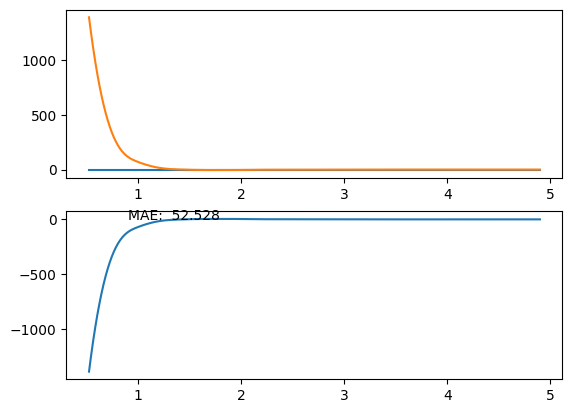

In [33]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2)
axes[0].plot(rs, fs)
axes[0].plot(rs, cs(rs))

axes[1].plot(rs, fs - cs(rs))

axes[1].text(0.9, 0.9, f"MAE: { np.abs(fs - cs(rs)).mean(): .3f}")

In [14]:
df

name method                                                  R  \
117    HH    ORB  [3.7199999999999998, 3.70996794, 3.69993586, 3...   
118  HeHe    ORB  [4.433, 4.42297362, 4.41294724, 4.40292086, 4....   
119  LiLi    ORB  [6.572, 6.56198152, 6.55196304, 6.54194454, 6....   
120  BeBe    ORB  [6.138, 6.12797338, 6.11794676, 6.10792016, 6....   
121    BB    ORB  [5.921, 5.91097088, 5.90094174, 5.89091262, 5....   
..    ...    ...                                                ...   
346  NhNh  ORBv2  [6.0, 5.989982779999999, 5.979965579999999, 5....   
347  FlFl  ORBv2  [6.0, 5.989982779999999, 5.979965579999999, 5....   
348  McMc  ORBv2  [6.0, 5.989982779999999, 5.979965579999999, 5....   
349  LvLv  ORBv2  [6.0, 5.989982779999999, 5.979965579999999, 5....   
350  TsTs  ORBv2  [6.0, 5.989982779999999, 5.979965579999999, 5....   

                                                     E  \
117  [-2.253027916, -2.2530450821, -2.2531223297, -...   
118  [-0.0489044189, -0.0488109589, -0.0487890244, ...   
119  [-0.6005258560000001, -0.600976944, -0.6010656...   
120  [0.1439437866, 0.1446228027, 0.1446933746, 0.1...   
121  [-1.7345266341999999, -1.7349262238, -1.735033...   
..                                                 ...   
346  [-1.2127504348754883, -1.2130546569824219, -1....   
347  [-1.6584091186523438, -1.6582937240600586, -1....   
348  [0.09161853790283203, 0.09169960021972656, 0.0...   
349  [0.1532306671142578, 0.15334033966064453, 0.15...   
350  [0.2908821105957031, 0.2906169891357422, 0.290...   

                                                     F S^2 force-flip-times  \
117  [0.00029414, 0.00030291, 0.00033964, 0.0003847...  []                4   
118  [0.00020237, 0.00022884, 0.00022473, 0.0002023...  []                2   
119  [-5.638e-05, -9.191e-05, -0.000119780000000000...  []                1   
120  [0.00024622, 0.00020539, 0.00021473, 0.0002307...  []                1   
121  [-5.236e-05, -9.37e-06, 1.198e-05, 1.637e-05, ...  []                1   
..                                                 ...  ..              ...   
346  [0.0, 7.4e-07, 0.0, 7e-08, 9.54e-06, 4.87e-06,...  []                1   
347  [0.0, 2.79e-06, 0.0, 4.8e-07, -1.968e-05, 7.6e...  []                1   
348  [0.0, -9.4e-07, 0.0, -2.38e-06, 0.0, 0.0, 0.0,...  []                1   
349  [0.0, -3.56e-06, 0.0, 6.36e-06, -4.78e-06, 8.1...  []                1   
350  [0.0, 4.57e-06, 0.0, -3.1e-07, -1.051e-05, -2....  []                1   

     force-total-variation energy-diff-flip-times  energy-grad-norm-max  ...  \
117             133.563746                      3            102.248369  ...   
118             125.775458                      3            133.955726  ...   
119              21.673787                      4             11.264810  ...   
120              74.423075                      5             17.538560  ...   
121             149.497415                      8             33.563880  ...   
..                     ...                    ...                   ...  ...   
346             418.177464                     10             66.461493  ...   
347             414.590097                     11             37.387570  ...   
348             429.250003                      4             74.488620  ...   
349             412.500944                      4             32.615990  ...   
350             393.376749                      6             90.260724  ...   

     energy-total-variation  conservation-deviation  \
117               13.361551                3.256510   
118               13.115419                2.880469   
119                6.484533                0.676364   
120               11.756050                3.683254   
121               16.196704                5.626231   
..                      ...                     ...   
346               23.668904               38.121299   
347               18.537373               46.828852   
348               28.765408               29.08030